In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Dataset 1

In [3]:
# load the dataset
data = pd.read_csv("data_data_preprocessing/data-preprocessed.csv")

In [4]:
# look always at the data
data.head()

,x,y,z,t,class
0,-0.031676,-9.912054,-0.579436,-1.044239,1
1,0.002526,6.172456,3.288339,-1.006427,5
2,0.183123,-0.387841,6.236470,-1.691491,2
3,-0.042262,-1.996272,-1.655302,-2.995311,1
4,-0.062811,-0.417072,6.657475,-3.633134,4


In [5]:
# we split the data, to the features for classification and the class
x= data[['x','y','z','t']]
y = data[['class']]

In [7]:
# look unique classes to now k, this k could be ideal, but we think it not has to maybe the algorithmus finds for example more classes
y["class"].unique()

array([1, 5, 2, 4, 6, 3], dtype=int64)

There are various approaches to determine the optimal number of clusters (k), such as the Elbow method, the Akaike Information Criterion (AIC), and the Bayesian Information Criterion (BIC). In this particular analysis, we will employ the Elbow method.

In the Elbow method, the inertia for different numbers of clusters is graphed, representing the effectiveness of the clustering. Specifically, it involves summing up squared distances to the centroid of each cluster. The goal is to identify a value for k where the inertia begins to exhibit a slower rate of decline, indicating a point of diminishing returns in terms of clustering improvement.

In [15]:
def optimise_kmeans(data,k_max):

    means = []
    inertias = []
    for k in range(1,k_max):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # elbow plot generation
    fig = plt.subplots(figsize=[10,5])
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters (k)', fontsize = 14)
    plt.ylabel('Inertia',fontsize = 14)
    plt.show()

C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

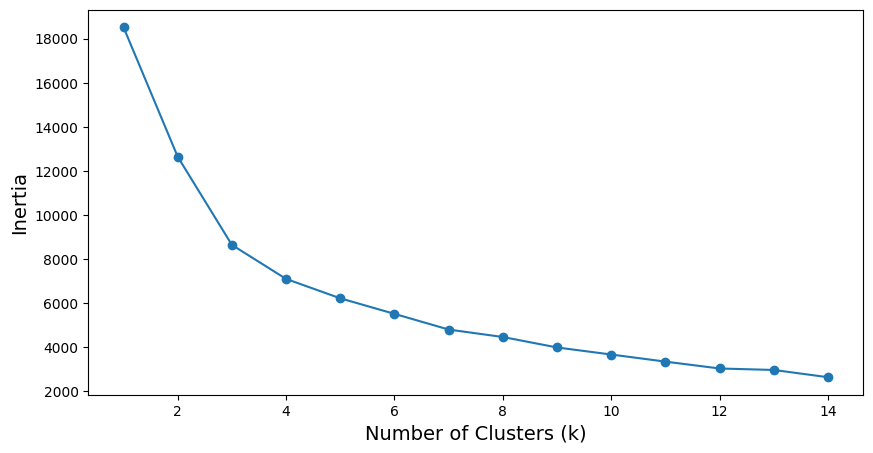

In [16]:
optimise_kmeans(data=x, k_max=15)


We observe that the inertia, representing the squared distances to the nearest cluster center, decreases as we increase the number of clusters. It becomes evident that for fewer than 4 clusters, the inertia changes rapidly. However, after reaching 6 clusters, the rate of decrease slows down. Therfore we would plot k = 4,5,6,7.

In [17]:
# Plot points with first two principal components
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(principal_components, columns=('PC1','PC2'))
principal_df.head()

,PC1,PC2
0,-11.140744,1.777584
1,5.264961,1.785206
2,-0.397063,-2.667042
3,-3.444823,4.255369
4,-0.098412,-3.439195


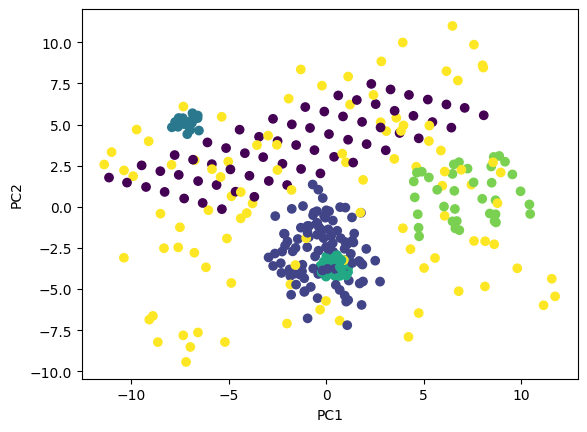

In [18]:
df = pd.concat([principal_df, y], axis=1)
plt.scatter(df['PC1'],df['PC2'], c=df['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [21]:
def plot_different_ks(x,ks):
    for k in ks:
        k_means = KMeans(n_clusters=k)
        k_means.fit(x)
        df = pd.concat([principal_df, y], axis=1)
        plt.scatter(df['PC1'],df['PC2'], c=k_means.labels_)
        plt.xlabel('PC1',fontsize = 14)
        plt.ylabel('PC2',fontsize = 14)
        plt.title(f"K-means Clustering with k={k}")
        plt.show()


C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


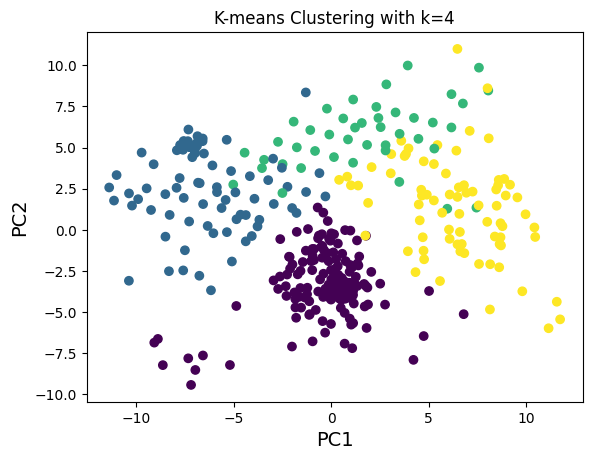

C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


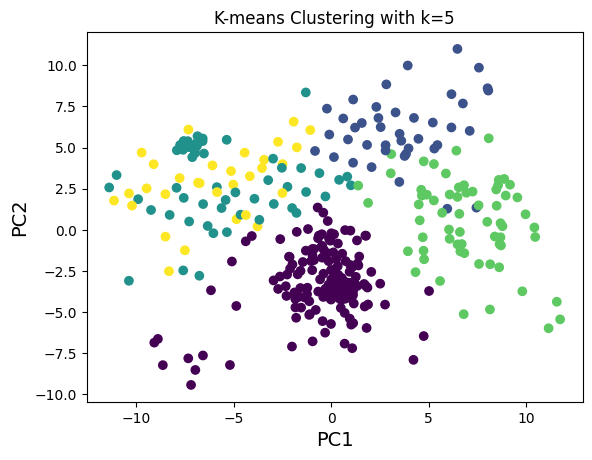

C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


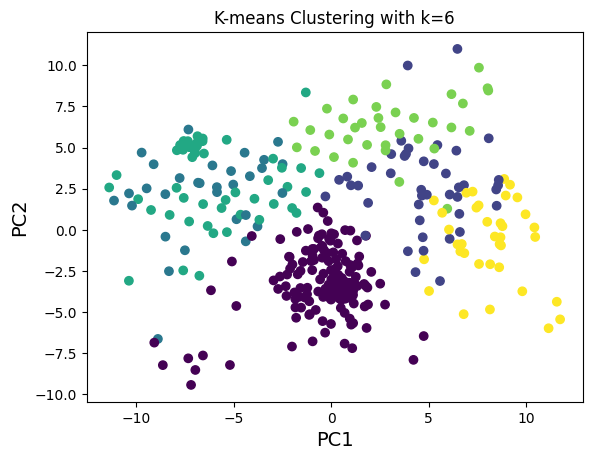

C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


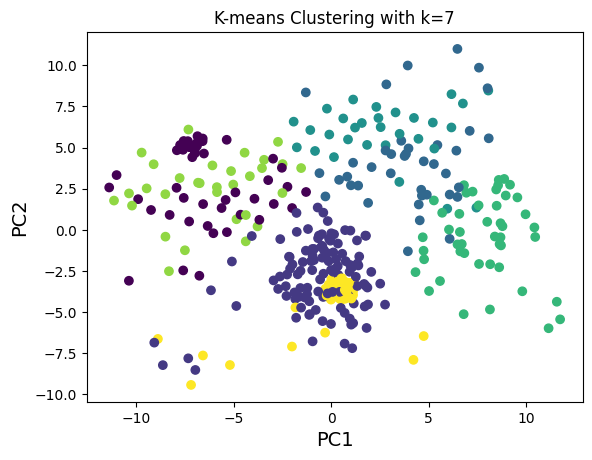

In [24]:
plot_different_ks(x,[4,5,6,7])

To clearer assess the results we can print the confusion matrix for k=6.

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

k_means = KMeans(n_clusters=6)
k_means.fit(x)

actual = list(df["class"])
predicted = k_means.labels_
print(df["class"].sort_values().unique())
print(f"predicted with wrong labels: {set(predicted)}")

for i in range(len(predicted)):
    predicted[i] = predicted[i] + 1
print(f"predicted with right labels: {set(predicted)}")


[1 2 3 4 5 6]
predicted with wrong labels: {0, 1, 2, 3, 4, 5}
predicted with right labels: {1, 2, 3, 4, 5, 6}


C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
def plot_confusion_matrix_for_specifick(actual,predicted):

    
    #compute the confusion matrix.
    cm = confusion_matrix(actual,predicted)

    print(set(actual))
    print(set(predicted))
    #Plot the confusion matrix.
    sns.heatmap(cm, 
                annot=True,
                fmt='g', 
                xticklabels=list(set(actual)),
                yticklabels=list(set(predicted)))
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()





{1, 2, 3, 4, 5, 6}
{1, 2, 3, 4, 5, 6}


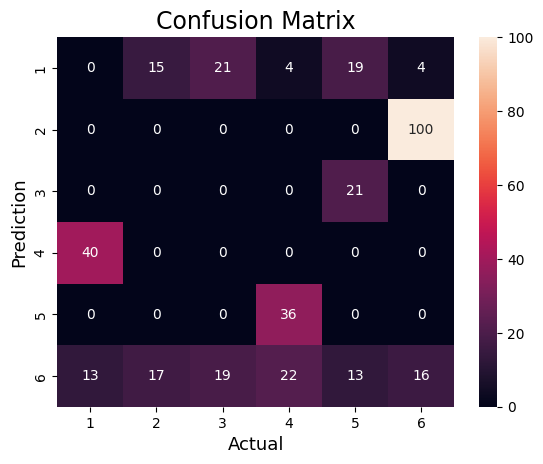

In [42]:
plot_confusion_matrix_for_specifick(actual,predicted)

In the ideal case all samples from one class are also classified together. The labels of the classes could not match. That means the meaning of the class 1 is different in our actual values and in the prediction. Nevertheless we can see for the values of each actual in how many prediction classes they are spread. 

So we can see here that the many values from the actual classes spread into the values the class 6. But There is not matching seeable between the classes. The valeus for every actual class are spreaded in two to three other classes. We think this is not a worst case result, but also not near to the ideal case.

# Glass Dataset

In [43]:
# load the dataset
data = pd.read_csv("glas_data_preprocessing/glas-preprocessed.csv")


In [44]:
# look always at the data
data.head()

,1,2,3,4,5,6,7,8,9,10
0,0.872868,0.284953,1.000000,-0.692442,-1.127082,-0.671705,-0.145766,0.0,0.0,1
1,-0.249333,0.591817,0.801782,-0.170460,0.102319,-0.026213,-0.793734,0.0,0.0,1
2,-0.721318,0.149933,0.790646,0.190912,0.438787,-0.164533,-0.828949,0.0,0.0,1
3,-0.232831,-0.242853,0.821826,-0.310994,-0.052974,0.112107,-0.519052,0.0,0.0,1
4,-0.312045,-0.169205,0.806236,-0.411375,0.555256,0.081369,-0.624699,0.0,0.0,1


In [45]:
# we split the data, to the features for classification and the class
x= data[['1','2','3','4','5','6','7','8','9']]
y = data[['10']]
y.head()

,10
0,1
1,1
2,1
3,1
4,1


In [46]:
# look unique classes to now k, this k could be ideal, but we think it not has to maybe the algorithmus finds for example more classes
y["10"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

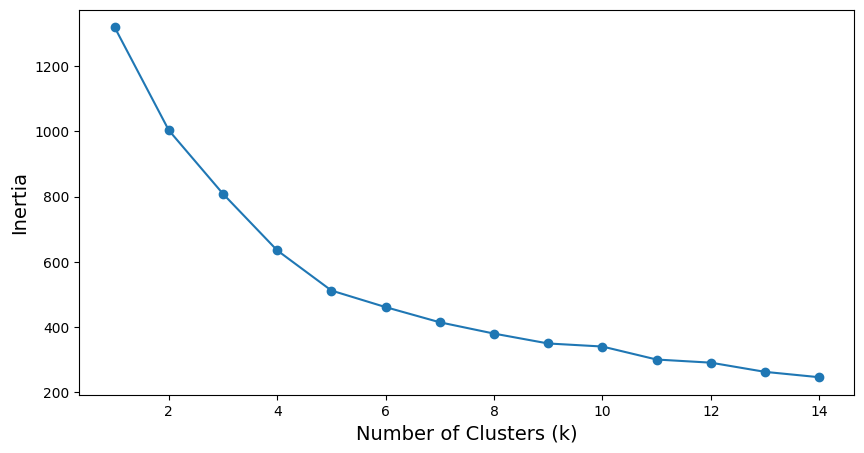

In [47]:
optimise_kmeans(data=x, k_max=15)

We observe that the inertia, representing the squared distances to the nearest cluster center, decreases as we increase the number of clusters. It becomes evident that for fewer than 5 clusters, the inertia changes rapidly. However, after reaching 6 clusters, the rate of decrease slows down. Therfore we would plot k = 5,6,7.

In [48]:
# Plot points with first two principal components
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(principal_components, columns=('PC1','PC2'))
principal_df.head()

,PC1,PC2
0,1.142310,-0.103165
1,-0.660708,-0.399898
2,-1.081236,-0.454561
3,-0.297773,0.052796
4,-0.540034,-0.352648


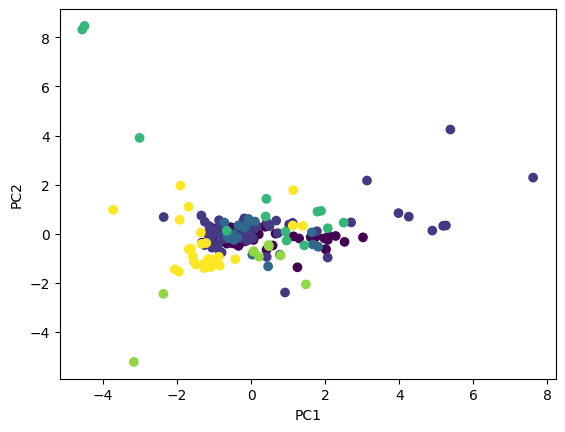

In [49]:
df = pd.concat([principal_df, y], axis=1)
plt.scatter(df['PC1'],df['PC2'], c=df['10'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


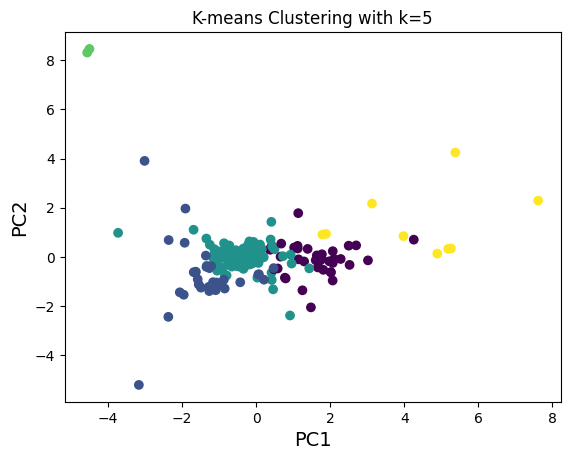

C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


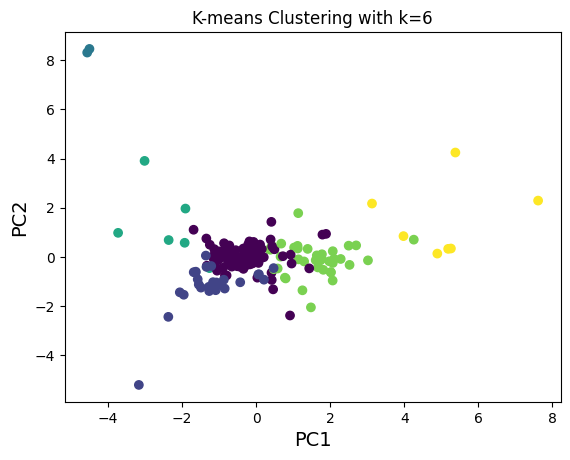

C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


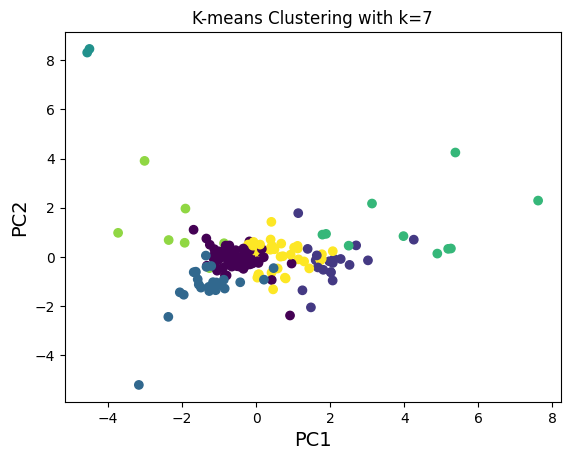

C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


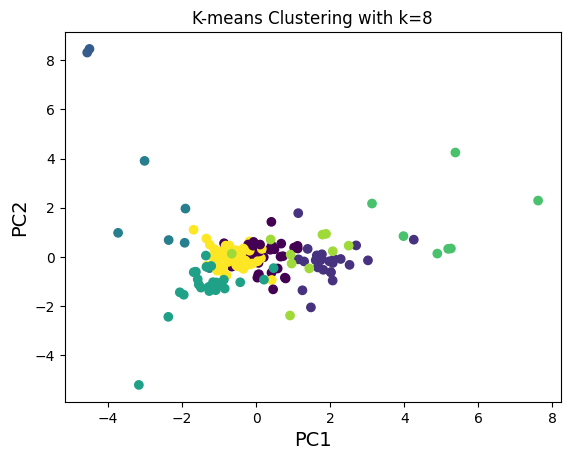

In [53]:
plot_different_ks(x,[5,6,7,8])

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

k_means = KMeans(n_clusters=6)
k_means.fit(x)

actual = list(df["10"])
predicted = k_means.labels_
print(df["10"].sort_values().unique())
print(f"predicted with wrong labels: {set(predicted)}")

for i in range(len(predicted)):
    predicted[i] = predicted[i] + 1
    if predicted[i] in [4,5,6]:
        predicted[i] = predicted[i] + 1

print(f"predicted with right labels: {set(predicted)}")



[1 2 3 5 6 7]
predicted with wrong labels: {0, 1, 2, 3, 4, 5}
predicted with right labels: {1, 2, 3, 5, 6, 7}


C:\Users\savas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{1, 2, 3, 5, 6, 7}
{1, 2, 3, 5, 6, 7}


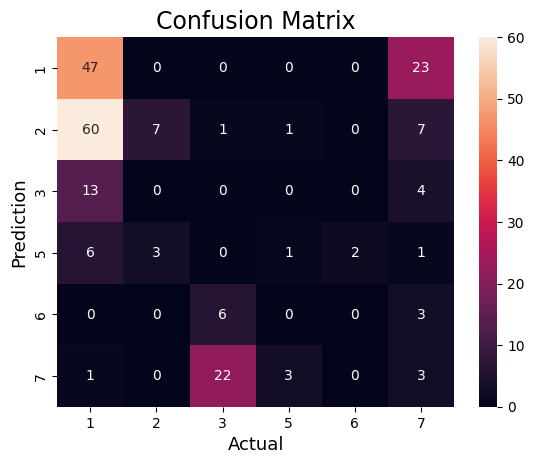

In [56]:
plot_confusion_matrix_for_specifick(actual,predicted)

In the ideal case all samples from one class are also classified together. The labels of the classes could not match. That means the meaning of the class 1 is different in our actual values and in the prediction. Nevertheless we can see for the values of each actual in how many prediction classes they are spread. 

So we can see here that the many values from the actual classes spread into the values the class 6. But There is not matching seeable between the classes. The valeus for every actual class are spreaded in two to three other classes. We think this is not a worst case result, but also not near to the ideal case.